In [1]:
import face_alignment
from skimage import io
import numpy as np
import torch
from scipy.io import loadmat


import cv2
import matplotlib.pyplot as plt

import matplotlib.patches as patches



In [2]:
img_url = '/media/flash/DATA/processing_frames/407/tc_faces/9/088180.png'

In [3]:
!ls

401_lmarks_location_eye.mat		Landmark Animation.ipynb
401_lmarks.mat				landmark_eye_region_backup
402_lmarks_location_eye.mat		Learning rate finder.ipynb
402_lmarks.mat				list_mine.txt
403_lmarks_location_eye.mat		model_18.onnx
403_lmarks.mat				model_19.onnx
404_demo_lmarks.mat			model_20.onnx
404_demo_output_results.npy		model_code
404_lmarks_location_eye.mat		model.onnx
404_lmarks.mat				multimodal_final.ipynb
405_lmarks_location_eye.mat		multimodal_final-refactor.ipynb
405_lmarks.mat				multimodal_log_1.txt
407_lmarks_location_eye.mat		multimodal_log_2.txt
407_lmarks.mat				multimodal_log_3.txt
410_lmarks_location_eye.mat		multimodal_log_4.txt
410_lmarks.mat				multimodal_log_5.txt
411_lmarks_location_eye.mat		multimodal_log_6_32.txt
best_136_model.py			multimodal_log.txt
check.png				multimodal_model_1.py
detect_landmarks_in_image.py		multimodal_model_6_32.py
detect_landmarks_in_image_v2.py		multi_modal_model.py
detect_landmarks_in_image_v3.py		multimodal_nn.ipynb
detect_landmar

In [4]:
!ls /media/flash/DATA/processing_frames/402/tc_faces/12/*

/media/flash/DATA/processing_frames/402/tc_faces/12/110000.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110001.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110002.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110003.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110004.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110005.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110006.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110007.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110008.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110009.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110010.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110011.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110012.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110013.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110014.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110

/media/flash/DATA/processing_frames/402/tc_faces/12/110291.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110292.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110293.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110294.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110295.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110296.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110297.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110298.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110299.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110300.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110301.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110302.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110303.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110304.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110305.png
/media/flash/DATA/processing_frames/402/tc_faces/12/110

/media/flash/DATA/processing_frames/402/tc_faces/12/118675.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118676.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118677.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118678.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118679.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118680.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118681.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118682.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118683.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118684.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118685.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118686.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118687.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118688.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118689.png
/media/flash/DATA/processing_frames/402/tc_faces/12/118

In [69]:
from os import listdir
from os.path import isfile, join
mypath = '/media/flash/DATA/processing_frames/402/tc_faces/9/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['085508.png', '087043.png', '084609.png', '085678.png', '084943.png', '080334.png', '083571.png', '082582.png', '084564.png', '089264.png', '083774.png', '088314.png', '082997.png', '088390.png', '083022.png', '081889.png', '086030.png', '080924.png', '084928.png', '085740.png', '085684.png', '088608.png', '083320.png', '081825.png', '085629.png', '087430.png', '081566.png', '086752.png', '082075.png', '085952.png', '083935.png', '086705.png', '085821.png', '086517.png', '082126.png', '087014.png', '082228.png', '083195.png', '089066.png', '083680.png', '084883.png', '089281.png', '080881.png', '086548.png', '088124.png', '088588.png', '080185.png', '082114.png', '089896.png', '082085.png', '087723.png', '087849.png', '084841.png', '080448.png', '085748.png', '083695.png', '085561.png', '081908.png', '080931.png', '087617.png', '089568.png', '088391.png', '084738.png', '080867.png', '081225.png', '082631.png', '084532.png', '081433.png', '084566.png', '089050.png', '080604.png', '0881

In [71]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

input = io.imread(img_url)
preds = fa.get_landmarks(input)

predictions = np.array(preds)
# print(preds.shape)

In [18]:
input.shape

(160, 160, 3)

In [46]:
print(predictions.shape)

(1, 68, 2)


('0', 'k')
('1', 'r')
('2', 'b')
('3', 'w')
('4', 'g')
('5', 'm')
('6', 'y')
(136,)


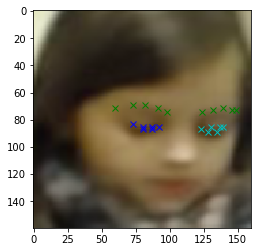

In [72]:
im = cv2.imread(img_url)

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

colors = {'1': 'r', '2': 'b','3' : 'w', '4' : 'g', '5' : 'm', '6' : 'y' , '0' : 'k'}

for i in range(0,68,10):
    x = predictions[0, i:i+10, 0]

#     print(x.shape)
    y = predictions[0, i:i+10, 1]
#     print(y.shape)

    key = str(int(i / 10))
    print(key, colors[key])
        
#     plt.plot(x, y, 'x', color=colors[key]);  
    
# preds = preds[-1]
preds = predictions.reshape(-1)        
print(preds.shape)

# print(predictions)

x = preds[0:135:2]
y = preds[1:136:2]

# print(x)
# print(y)
# x = predictions[0, :, 0]
# y = predictions[0, :, 1]

# print('Vrednost ' + str(predictions[0,0,0]) + str(predictions[0,0,1]))
left_eye = (42,48)
right_eye = (36,42)

brows = (17,27)
# right_brow = (17,22)
# left_brow = (22,27)
#nose top 27-36
#left eye 42-48
#right eye 36-42

plt.plot(x[left_eye[0]:left_eye[1]], y[left_eye[0]:left_eye[1]], 'x', color='c')
plt.plot(x[right_eye[0]:right_eye[1]], y[right_eye[0]:right_eye[1]], 'x', color='b')

# plt.plot(x[right_brow[0]:right_brow[1]], y[right_brow[0]:right_brow[1]], 'x', color='r')
# plt.plot(x[left_brow[0]:left_brow[1]], y[left_brow[0]:left_brow[1]], 'x', color='y')

plt.plot(x[brows[0]:brows[1]], y[brows[0]:brows[1]], 'x', color='g')






plt.show()

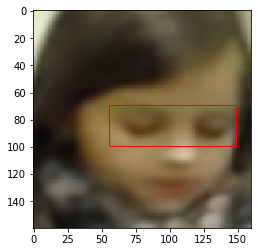

In [73]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

x_eye_region = np.concatenate((x[left_eye[0]:left_eye[1]], x[right_eye[0]:right_eye[1]], x[brows[0]:brows[1]]))
y_eye_region = np.concatenate((y[left_eye[0]:left_eye[1]], y[right_eye[0]:right_eye[1]], y[brows[0]:brows[1]]))

rect_x = np.min(x_eye_region)
rect_y = np.min(y_eye_region)

width = np.max(x_eye_region) - rect_x
height = np.max(y_eye_region) - rect_y

tolerance = 0

rect_x = rect_x - 2 * tolerance - 5 if  rect_x - 2 * tolerance > 0 else 0
rect_y = rect_y - 2 * tolerance if rect_y - 2 * tolerance > 0 else 0
width =  width + 2 * tolerance + 5 if width + 2 * tolerance + rect_x < 159 else 159
height = height + 2 * tolerance + 10 if height + 2 * tolerance + rect_y < 159 else  159


rect = patches.Rectangle((rect_x, rect_y),width ,height,linewidth=1,edgecolor='r',facecolor='none')
ax = plt.gca()

ax.add_patch(rect)

plt.show()

## Exporting results of finding eye regions

In [11]:
# fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False)


# """Returns eye region as 4 value tuple (x,y, width, height)"""
# def export_eye_region(image_path):

#     input = io.imread(image_path)
#     preds = fa.get_landmarks(input)

#     predictions = np.array(preds)
    
    
#     #take specific landmarks
#     left_eye = (42,48)
#     right_eye = (36,42)

#     brows = (17,27)
    
    
    
#     x = predictions[0, :, 0]
#     y = predictions[0, :, 1]
    
#     #find eye region
#     x_eye_region = np.concatenate((x[left_eye[0]:left_eye[1]], x[right_eye[0]:right_eye[1]], x[brows[0]:brows[1]]))
#     y_eye_region = np.concatenate((y[left_eye[0]:left_eye[1]], y[right_eye[0]:right_eye[1]], y[brows[0]:brows[1]]))

#     rect_x = np.min(x_eye_region)
#     rect_y = np.min(y_eye_region)
    
#     width = np.max(x_eye_region) - rect_x
#     height = np.max(y_eye_region) - rect_y
    
#     tolerance = 20

    

    
#     return (rect_x, rect_y, width, height + tolerance)
    
    
    

In [109]:
"""Returns eye region as 4 value tuple (x,y, width, height)"""
def export_eye_region_no_face_alignment(ftrs):
   
    x = ftrs[0:135:2]
    y = ftrs[1:136:2]
    #take specific landmarks
    left_eye = (42,48)
    right_eye = (36,42)

    brows = (17,27)
    
    
    #find eye region
    x_eye_region = np.concatenate((x[left_eye[0]:left_eye[1]], x[right_eye[0]:right_eye[1]], x[brows[0]:brows[1]]))
    y_eye_region = np.concatenate((y[left_eye[0]:left_eye[1]], y[right_eye[0]:right_eye[1]], y[brows[0]:brows[1]]))

    rect_x = np.min(x_eye_region)
    rect_y = np.min(y_eye_region)
    
    width = np.max(x_eye_region) - rect_x
    height = np.max(y_eye_region) - rect_y
    
    tolerance = 5

    
    rect_x = rect_x - tolerance if  rect_x - tolerance > 0 else 0
    rect_y = rect_y - tolerance if rect_y - tolerance > 0 else 0
    width =  width + 2 * tolerance if width + tolerance + rect_x < 159 else 159
    height = height + 2 * tolerance if height + tolerance + rect_y < 159 else  159

    return (rect_x, rect_y, width, height)
    
    
    

In [2]:
def extract_data(indices, suffix = '', include_pos = True):
  ftrs = torch.Tensor()
  ftrs = ftrs.type(torch.cuda.FloatTensor)  
  gz = torch.Tensor()
  gz = gz.type(torch.cuda.FloatTensor)  
  
  for index in indices:
    data = loadmat(str(index) + suffix + '_lmarks.mat')
    ftrs_single = torch.from_numpy(data['ftrs'])
    
    ftrs_single_pos = torch.from_numpy(data['pos'])
    
    ftrs_single = ftrs_single.type(torch.cuda.FloatTensor)  
    ftrs_single_pos = ftrs_single_pos.type(torch.cuda.FloatTensor)

#     print(ftrs.is_cuda)
    
#     concat_ftrs =  torch.cat((torch.t(ftrs_single), torch.t(ftrs_single_pos)))
    ftrs = torch.cat((ftrs, ftrs_single))
#     ftrs = torch.cat((ftrs, torch.t(concat_ftrs)))


    gz_single = torch.from_numpy(data['gz'])
    gz_single = gz_single.type(torch.cuda.FloatTensor)  

    gz_single = torch.t(gz_single)

    gz = torch.cat((gz, gz_single))
    
    
  return(ftrs, gz)


#### Trying out new function for exporting eye region

In [153]:
family = 410

In [154]:
ftrs = torch.Tensor()
gz = torch.Tensor()

(ftrs, gz) = extract_data([family])

In [155]:
ftrs.shape

torch.Size([98659, 136])

In [156]:
ftrs.cpu().numpy().shape

(98659, 136)

In [157]:
eye_region_frame_array = np.zeros((ftrs.shape[0], 4))
ftrs_numpy = ftrs.cpu().numpy()

for i in np.arange(ftrs.shape[0]):
    if i % 10000 == 0: 
        print(i)
    x = ftrs_numpy[i, :]
    (new_x, new_y, new_width, new_height) = export_eye_region_no_face_alignment(x)
    eye_region_frame_array[i, :] = np.array([new_x, new_y, new_width, new_height])

print('Done!')

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Done!


In [ ]:
# import glob, os

# def files(path):
#     for file in glob.glob(path):
#         if os.path.isfile(os.path.join(path, file)):
#             yield file

# path = "/media/flash/DATA/processing_frames/{0}/tc_faces/*/*".format(family)
# files_string = []
# files_count = 0
# for file in files(path):
#     files_count += 1
    
# print(files_count)

# eye_region_frame_array = np.zeros((files_count, 4))

# for index, file in enumerate(files(path)):
#     try:
#         if index % 100 == 0:
#             print(file, index)
#         (new_x, new_y, new_width, new_height) = export_eye_region(file)
#         eye_region_frame_array[index, :] = np.array([new_x, new_y, new_width, new_height])
#     except:
#         print('File which had no faces is {0} at {1}' % (file, index))

#         eye_region_frame_array[index, :] = np.zeros((1, 4))



    

In [158]:
print(eye_region_frame_array)

[[ 12.  53.  29.  80.]
 [ 19.  33. 121.  40.]
 [ 22.  11. 122.  53.]
 ...
 [ 87.  51.  74. 103.]
 [ 49.  51.  97.  36.]
 [ 65.  61.  88.  30.]]


In [159]:
np.save('{0}_eye_region.npy'.format(family), eye_region_frame_array)

In [160]:
!ls

401_eye_region.npy	     detect_landmarks_in_image.py
401_lmarks.mat		     detect_landmarks_in_image_v2.py
402_eye_region.npy	     detect_landmarks_in_image_v3.py
402_lmarks.mat		     Figure_1.png
403_eye_region.npy	     Figure_2.png
403_lmarks.mat		     Figure_3.png
404_demo_lmarks.mat	     Figure_4.png
404_demo_output_results.npy  Figure_5.png
404_eye_region.npy	     Figure_6.png
404_lmarks.mat		     Figure_7.png
405_eye_region.npy	     Figure_8.png
405_lmarks.mat		     Find face landmark positions.ipynb
407_eye_region.npy	     hyperparameter_tuning_results.txt
407_lmarks.mat		     list_mine.txt
410_eye_region.npy	     results
410_lmarks.mat		     simple_nn_(1)-Copy1.ipynb
best_136_model.py	     simple_nn_(1).ipynb
check.png		     simple_nn_errors_407_410_only.ipynb


In [173]:
import face_alignment
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import io
from scipy.io import savemat
import datetime 

def export_eye_region(ftrs):
   
    x = ftrs[0:135:2]
    y = ftrs[1:136:2]
    #take specific landmarks
    left_eye = (42,48)
    right_eye = (36,42)

    brows = (17,27)
    
    
    #find eye region
    x_eye_region = np.concatenate((x[left_eye[0]:left_eye[1]], x[right_eye[0]:right_eye[1]], x[brows[0]:brows[1]]))
    y_eye_region = np.concatenate((y[left_eye[0]:left_eye[1]], y[right_eye[0]:right_eye[1]], y[brows[0]:brows[1]]))

    rect_x = np.min(x_eye_region)
    rect_y = np.min(y_eye_region)
    
    width = np.max(x_eye_region) - rect_x
    height = np.max(y_eye_region) - rect_y
    
    tolerance = 5

    
    rect_x = rect_x - tolerance if  rect_x - tolerance > 0 else 0
    rect_y = rect_y - tolerance if rect_y - tolerance > 0 else 0
    width =  width + 2 * tolerance if width + tolerance + rect_x < 159 else 159
    height = height + 2 * tolerance if height + tolerance + rect_y < 159 else  159

    return (rect_x, rect_y, width, height)



# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda', flip_input=True)

families = [401,402,403]

for family in families:

    file_path = "/media/flash/DATA/%d_gaze_tcpos_data_shuffle.txt" % (family)
    fid = open(file_path, 'r')
    lines = fid.readlines()
    ftr_list = []
    gaze_list = []
    pos_list = []
    frm_list = []
    location_list = []
    eye_region_list = []

    begin = datetime.datetime.now()

    count = 0
    for line in lines:
        img_path, gaze, pl, pt, pr, pb = line.strip().split(' ')
        input = io.imread(img_path)
        preds = fa.get_landmarks(input)
        if preds is None:
            continue
        else:
            preds = preds[-1]
        preds = preds.reshape(-1)
        location_list.append(img_path)
        ftr_list.append(preds)
        frm_list.append(img_path)
        gaze_list.append(int(gaze))    
        pos_list.append([int(pl), int(pt), int(pr), int(pb)])

        (x,y,w,h) = export_eye_region(np.asarray(preds))
        eye_region_list.append([x,y,w,h])

        count+=1
        if count%100==0:
            print 'done', count

    ftr_list = np.array(ftr_list)
    print ftr_list.shape
    gaze_list = np.array(gaze_list)
    pos_list = np.array(pos_list)
    #frm_list = np.array(frm_list, dtype=np.str)

    end = datetime.datetime.now()

    print('Our time is ', (end - begin))
    savemat('%d_lmarks_location_eye.mat' % (family),{'ftrs':ftr_list, 'gz':gaze_list, 'pos':pos_list, 'location' : location_list, 'eye_reg' : eye_region_list})




done 100
done 200
done 300
done 400
done 500
done 600
done 700
done 800
done 900
done 1000
done 1100
done 1200
done 1300
done 1400
done 1500
done 1600
done 1700
done 1800
done 1900
done 2000
done 2100
done 2200
done 2300
done 2400
done 2500
done 2600
done 2700
done 2800
done 2900
done 3000
done 3100
done 3200


done 3300
done 3400
done 3500
done 3600
done 3700
done 3800
done 3900
done 4000
done 4100
done 4200
done 4300
done 4400
done 4500
done 4600
done 4700
done 4800
done 4900
done 5000
done 5100
done 5200
done 5300
done 5400
done 5500
done 5600
done 5700
done 5800
done 5900
done 6000


done 6100
done 6200
done 6300


KeyboardInterrupt: 

In [170]:
from scipy.io import loadmat
data = loadmat('404_lmarks_location_eye.mat')     

In [ ]:
im